In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


# **Load data**

In [2]:
train_data_values=pd.read_csv('pump-data/training_values.csv')
train_data_labels=pd.read_csv('pump-data/training_labels.csv')
test_data=pd.read_csv('pump-data/test_values.csv')
train_data = train_data_values.merge(train_data_labels, on='id')
test_data_predict = test_data.copy()

In [3]:
train_data_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [4]:
train_data_values

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


# Preprocessing

In [5]:
data=train_data.append(test_data)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [7]:
data.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4504
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4846
scheme_name              35258
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
data.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# #drop list
1. management_group : similar to 'management', 'management' has more detailed values
2. scheme_management : similar to 'management', 'scheme_management' has 3877 null values
3. quantity_group : similar to 'quantity'
4. source_class : similar to 'source'
5. source_type : similar to 'source'
6. quality_group : similar to 'water_quality'
7. payment_type : similar to 'payment'
8. extraction_type : similar to 'extraction_type_group', 'extraction_type_group' has more compact values
9. extraction_type_class : similar to 'extraction_type_group', 'extraction_type_group' has more detailed values
10. waterpoint_type_group : similar to 'waterpoint_type', 'waterpoint_type' has more detailed values
11. recorded_by : has only one value, doesn't have any information
12. wpt_name : does not have any information about functionality
13. scheme_name : does not have any information about functionality
14. num_private : most of the values are zero
15. date_recorded : does not have necessary information about functionality
16. subvillage : region and region_code are representing the same thing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

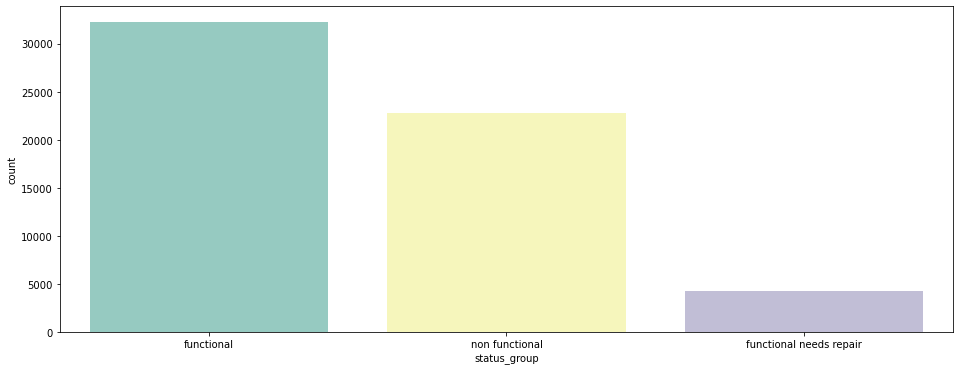

In [9]:

plt.figure(figsize=(16,6))
sns.countplot(data.status_group, palette = 'Set3')
data.status_group.value_counts()

# 1.1. management /scheme_management / management_group columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-10-38e6d694ec40>

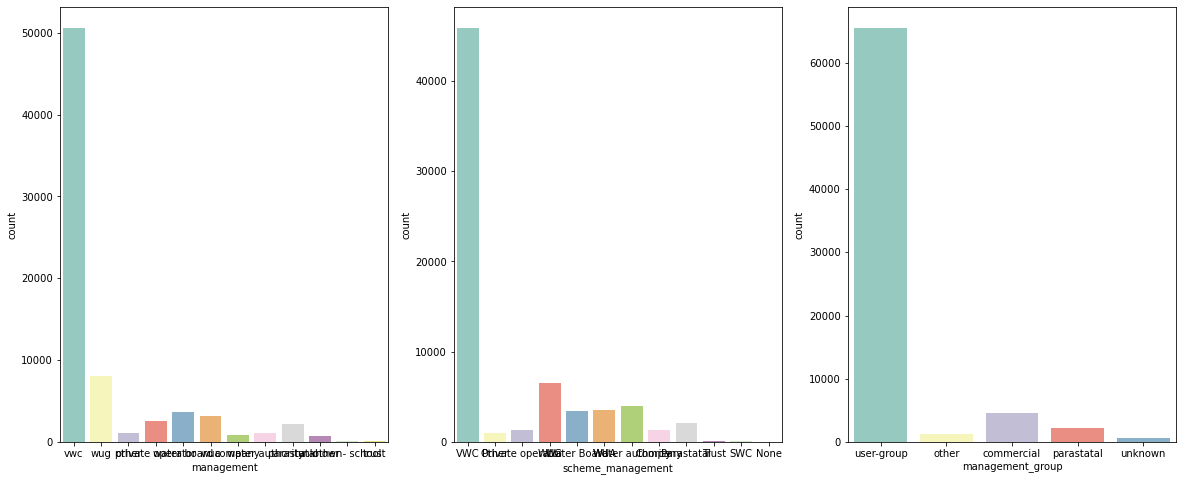

In [10]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 3)
sns.countplot(data.management, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.scheme_management, x="col2", ax=axes[1], palette = 'Set3')
sns.countplot(data.management_group, x="col3", ax=axes[2], palette = 'Set3')
fig.show()

In [11]:
data['management'].value_counts()

vwc                 50624
wug                  8108
water board          3688
wua                  3118
private operator     2504
parastatal           2229
water authority      1123
other                1083
company               859
unknown               683
other - school        126
trust                 105
Name: management, dtype: int64

In [12]:
data['scheme_management'].value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [13]:
data['management_group'].value_counts()

user-group    65538
commercial     4591
parastatal     2229
other          1209
unknown         683
Name: management_group, dtype: int64

In [14]:
data.groupby(['management_group','management']).count()

id  amount_tsh  date_recorded  funder  \
management_group management                                                   
commercial       company             859         859            859     834   
                 private operator   2504        2504           2504    2484   
                 trust               105         105            105     105   
                 water authority    1123        1123           1123    1046   
other            other              1083        1083           1083    1075   
                 other - school      126         126            126     126   
parastatal       parastatal         2229        2229           2229    2045   
unknown          unknown             683         683            683     648   
user-group       vwc               50624       50624          50624   47065   
                 water board        3688        3688           3688    3411   
                 wua                3118        3118           3118    2842   
                 wug                8108        8108           8108    8065   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  859        834        859       859   
                 private operator        2504       2486       2504      2504   
                 trust                    105        105        105       105   
                 water authority         1123       1046       1123      1123   
other            other                   1083       1069       1083      1083   
                 other - school           126        126        126       126   
parastatal       parastatal              2229       2044       2229      2229   
unknown          unknown                  683        639        683       683   
user-group       vwc                    50624      47062      50624     50624   
                 water board             3688       3409       3688      3688   
                 wua                     3118       2843       3118      3118   
                 wug                     8108       8055       8108      8108   

                                   wpt_name  num_private  ...  water_quality  \
management_group management                               ...                  
commercial       company                859          859  ...            859   
                 private operator      2504         2504  ...           2504   
                 trust                  105          105  ...            105   
                 water authority       1123         1123  ...           1123   
other            other                 1083         1083  ...           1083   
                 other - school         126          126  ...            126   
parastatal       parastatal            2229         2229  ...           2229   
unknown          unknown                683          683  ...            683   
user-group       vwc                  50624        50624  ...          50624   
                 water board           3688         3688  ...           3688   
                 wua                   3118         3118  ...           3118   
                 wug                   8108         8108  ...           8108   

                                   quality_group  quantity  quantity_group  \
management_group management                                                  
commercial       company                     859       859             859   
                 private operator           2504      2504            2504   
                 trust                       105       105             105   
                 water authority            1123      1123            1123   
other            other                      1083      1083            1083   
                 other - school              126       126             126   
parastatal       parastatal                 2229   

# 1.2. quantity / quantity_group columns

In [15]:
data['quantity'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity, dtype: int64

In [16]:
data['quantity_group'].value_counts()

enough          41522
insufficient    18896
dry              7782
seasonal         5075
unknown           975
Name: quantity_group, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-17-b153eaaf64c0>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


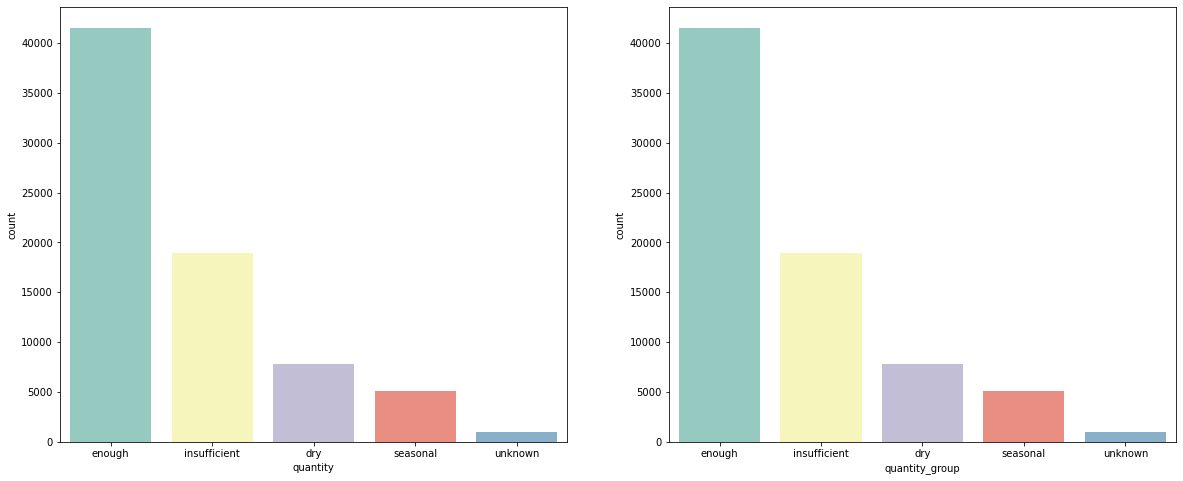

In [17]:

plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 2)
sns.countplot(data.quantity, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.quantity_group, x="col2", ax=axes[1], palette = 'Set3')
fig.show()

<AxesSubplot:xlabel='quantity', ylabel='count'>

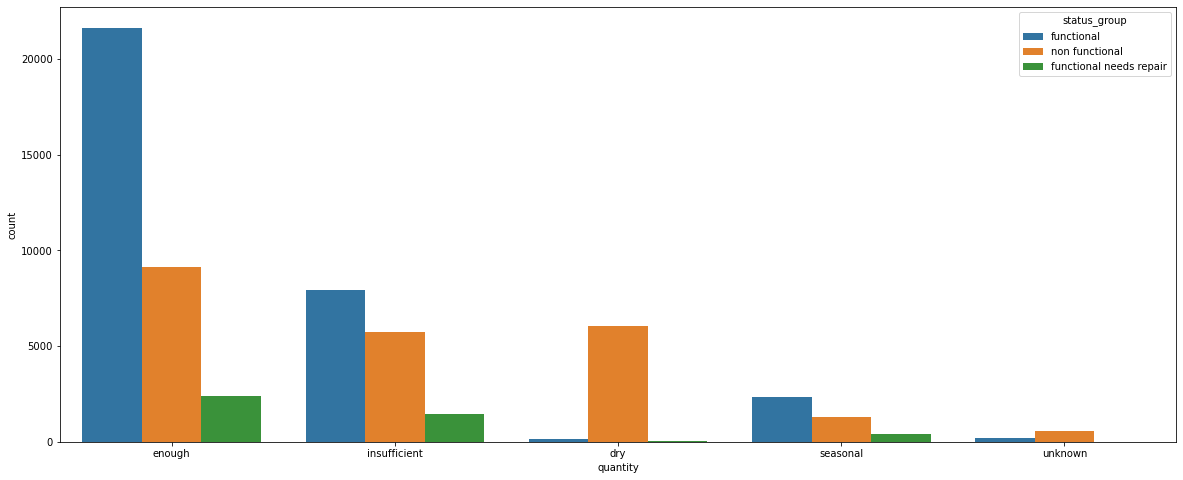

In [18]:
sns.countplot( data=data, x='quantity', hue="status_group")

dry quantity, unknown -> high chance that point is non functional

enough                -> high chance that point is functional

<AxesSubplot:xlabel='quantity_group', ylabel='count'>

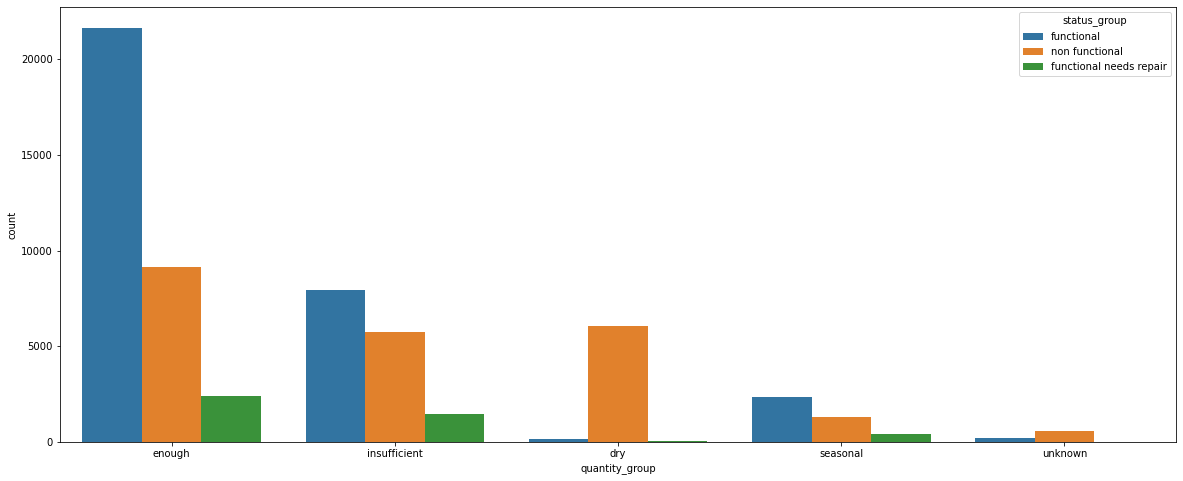

In [19]:
sns.countplot( data=data, x='quantity_group', hue="status_group")

# 1.3. source / source_type/ source_class columns

In [20]:
data.groupby(['source_class','source']).count()

id  amount_tsh  date_recorded  funder  \
source_class source                                                           
groundwater  hand dtw               1108        1108           1108    1098   
             machine dbh           13822       13822          13822   12816   
             shallow well          21140       21140          21140   20507   
             spring                21216       21216          21216   19778   
surface      dam                     840         840            840     828   
             lake                    950         950            950     946   
             rainwater harvesting   2863        2863           2863    2607   
             river                 11964       11964          11964   10854   
unknown      other                   261         261            261     253   
             unknown                  86          86             86      59   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                    1108       1098       1108      1108   
             machine dbh                13822      12807      13822     13822   
             shallow well               21140      20490      21140     21140   
             spring                     21216      19778      21216     21216   
surface      dam                          840        828        840       840   
             lake                         950        945        950       950   
             rainwater harvesting        2863       2600       2863      2863   
             river                      11964      10860      11964     11964   
unknown      other                        261        253        261       261   
             unknown                       86         59         86        86   

                                   wpt_name  num_private  ...  payment  \
source_class source                                       ...            
groundwater  hand dtw                  1108         1108  ...     1108   
             machine dbh              13822        13822  ...    13822   
             shallow well             21140        21140  ...    21140   
             spring                   21216        21216  ...    21216   
surface      dam                        840          840  ...      840   
             lake                       950          950  ...      950   
             rainwater harvesting      2863         2863  ...     2863   
             river                    11964        11964  ...    11964   
unknown      other                      261          261  ...      261   
             unknown                     86           86  ...       86   

                                   payment_type  water_quality  quality_group  \
source_class source                                                             
groundwater  hand dtw                      1108           1108           1108   
             machine dbh                  13822          13822          13822   
             shallow well                 21140          21140          21140   
             spring                       21216          21216          21216   
surface      dam                            840            840            840   
             lake                           950            950            950   
             rainwater harvesting          2863           2863           2863   
             river                        11964          11964          11964   
unknown      other                          261            261            261   
             unknown                         86             86             86   

                                   quantity  quantity_group  source_type  \
source_class source                                                        
groundwater  hand dtw                  1108            1108         1108   
             machine dbh  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-21-dd7217b289b7>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


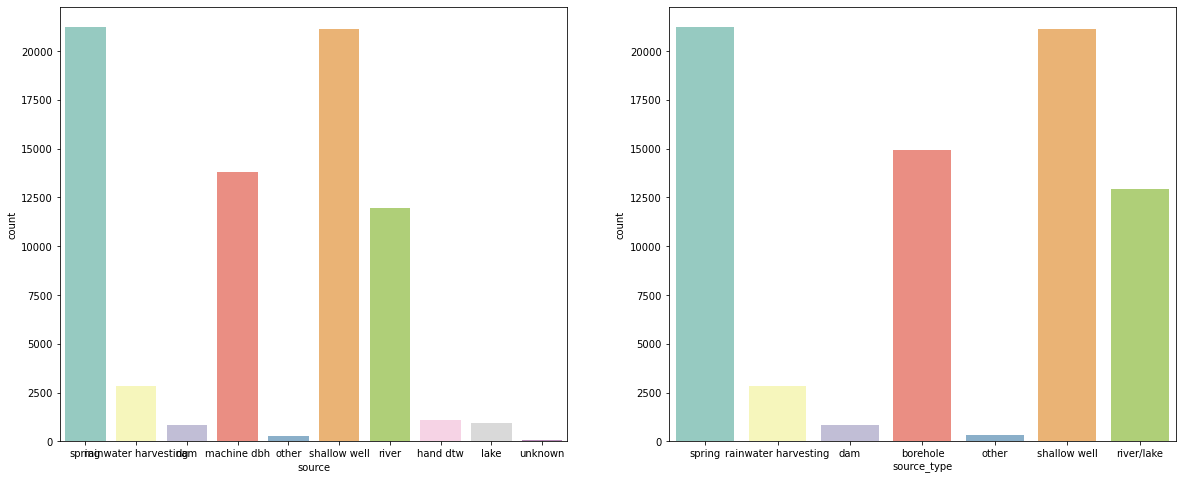

In [21]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 2)
sns.countplot(data.source, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.source_type, x="col2", ax=axes[1], palette = 'Set3')
fig.show()

In [22]:
data['source'].value_counts()

spring                  21216
shallow well            21140
machine dbh             13822
river                   11964
rainwater harvesting     2863
hand dtw                 1108
lake                      950
dam                       840
other                     261
unknown                    86
Name: source, dtype: int64

In [23]:
data['source_type'].value_counts()

spring                  21216
shallow well            21140
borehole                14930
river/lake              12914
rainwater harvesting     2863
dam                       840
other                     347
Name: source_type, dtype: int64

<AxesSubplot:xlabel='source_class', ylabel='count'>

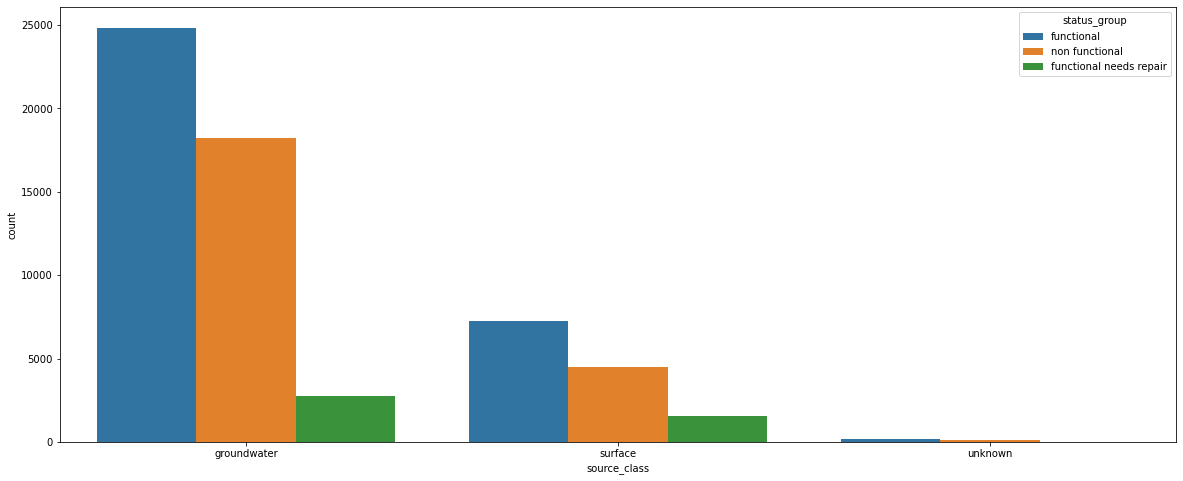

In [24]:
sns.countplot(x='source_class', hue="status_group", data=data)

# 1.4. water_quality / quality_group columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-25-b2df9a3649b7>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


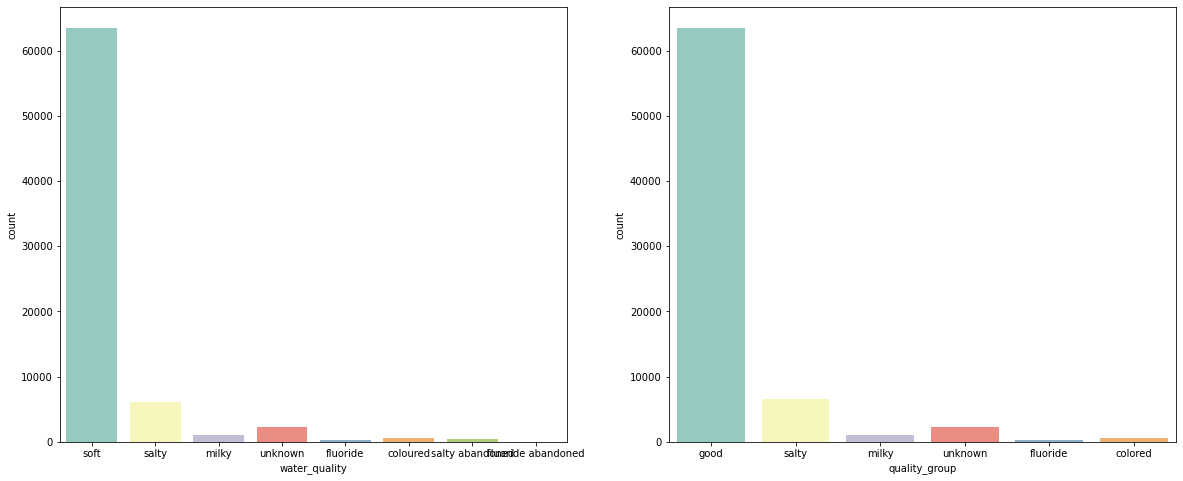

In [25]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 2)
sns.countplot(data.water_quality, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.quality_group, x="col2", ax=axes[1], palette = 'Set3')
fig.show()

In [26]:
data['water_quality'].value_counts()

soft                  63505
salty                  6082
unknown                2345
milky                  1005
coloured                623
salty abandoned         423
fluoride                244
fluoride abandoned       23
Name: water_quality, dtype: int64

In [27]:
data['quality_group'].value_counts()

good        63505
salty        6505
unknown      2345
milky        1005
colored       623
fluoride      267
Name: quality_group, dtype: int64

<AxesSubplot:xlabel='water_quality', ylabel='count'>

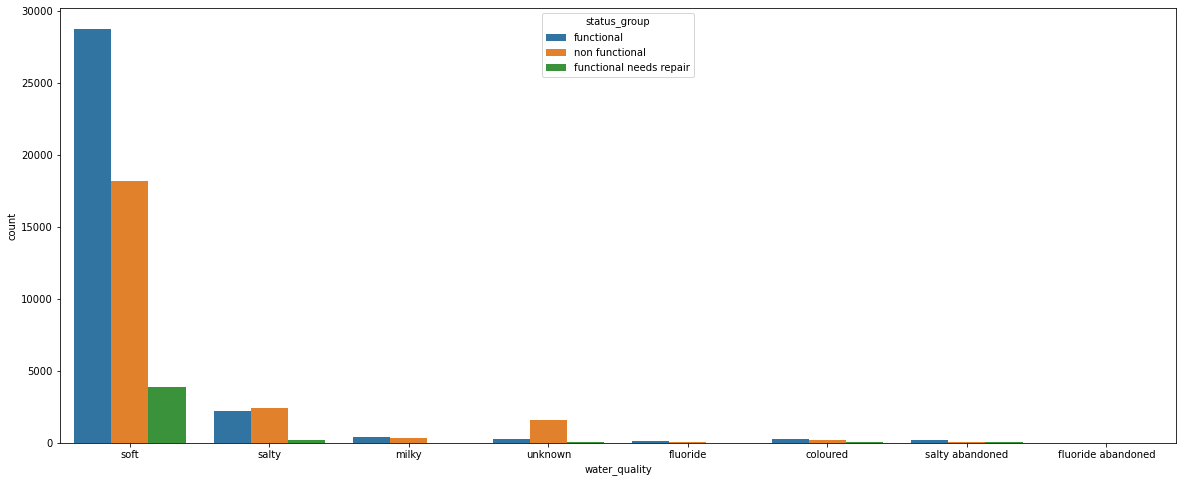

In [28]:
sns.countplot(x='water_quality', hue='status_group', data=data)

# 1.5. payment / payment_type columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-29-03cfad2efbdf>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


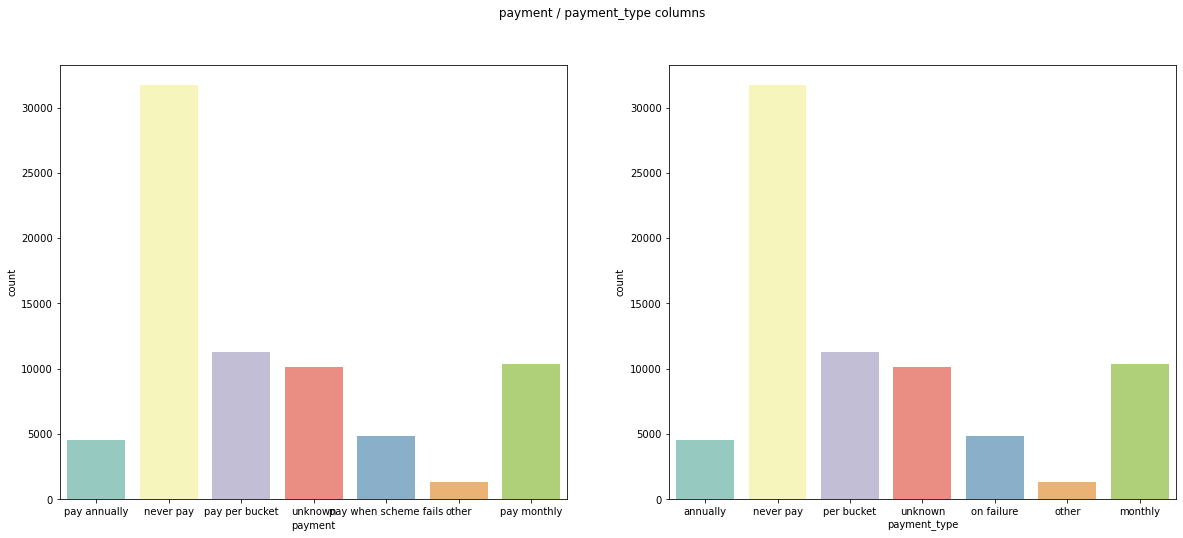

In [29]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 2)
sns.countplot(data.payment, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.payment_type, x="col2", ax=axes[1], palette = 'Set3')
fig.suptitle(' payment / payment_type columns')
fig.show()

In [30]:
data['payment'].value_counts()

never pay                31712
pay per bucket           11266
pay monthly              10397
unknown                  10149
pay when scheme fails     4842
pay annually              4570
other                     1314
Name: payment, dtype: int64

In [31]:
data['payment_type'].value_counts()

never pay     31712
per bucket    11266
monthly       10397
unknown       10149
on failure     4842
annually       4570
other          1314
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment', ylabel='count'>

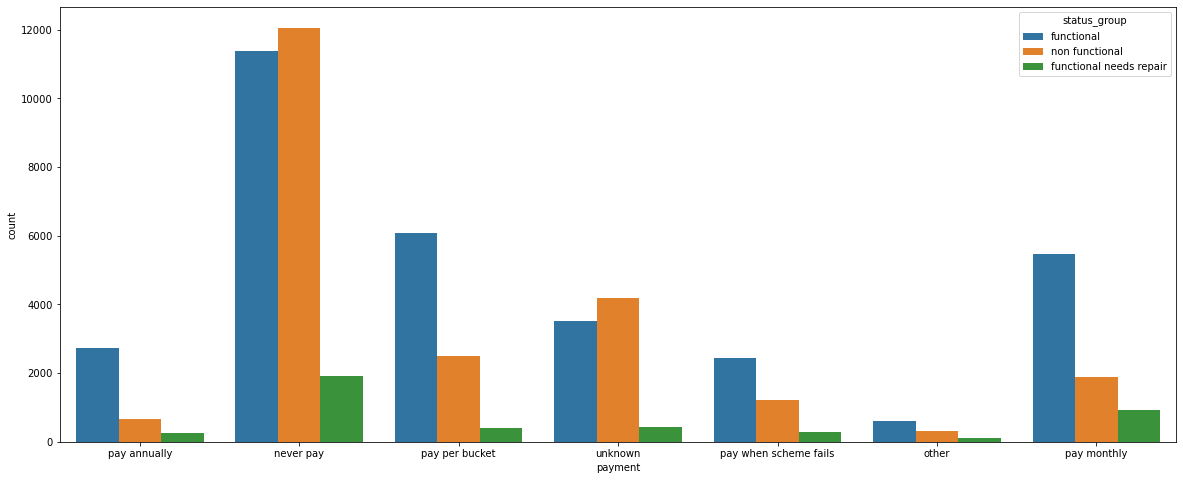

In [32]:
sns.countplot(x='payment', hue="status_group", data=data)

# 1.6. extraction_type / extraction_type_group / extraction_type_class columns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-33-54746a32df20>

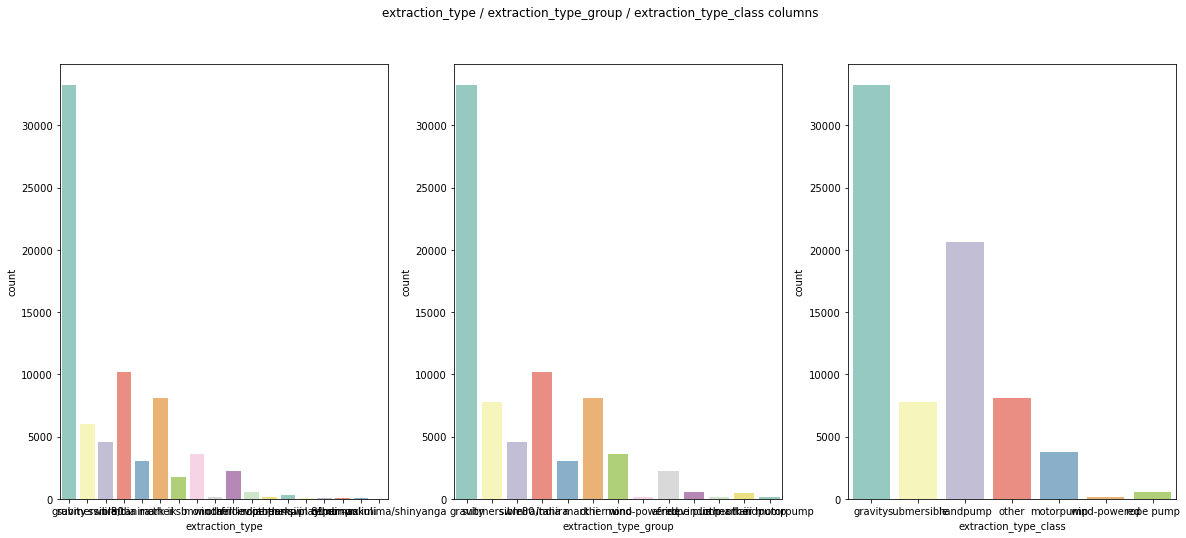

In [33]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 3)
sns.countplot(data.extraction_type, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.extraction_type_group, x="col2", ax=axes[1], palette = 'Set3')
sns.countplot(data.extraction_type_class, x="col3", ax=axes[2], palette = 'Set3')
fig.suptitle('extraction_type / extraction_type_group / extraction_type_class columns')
fig.show()

In [34]:
data['extraction_type'].value_counts()

gravity                      33263
nira/tanira                  10205
other                         8102
submersible                   5982
swn 80                        4588
mono                          3628
india mark ii                 3029
afridev                       2208
ksb                           1790
other - rope pump              572
other - swn 81                 284
windmill                       152
india mark iii                 135
cemo                           108
other - play pump              101
walimi                          60
climax                          41
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [35]:
data['extraction_type_group'].value_counts()

gravity            33263
nira/tanira        10205
other               8102
submersible         7772
swn 80              4588
mono                3628
india mark ii       3029
afridev             2208
rope pump            572
other handpump       447
wind-powered         152
other motorpump      149
india mark iii       135
Name: extraction_type_group, dtype: int64

In [36]:
data['extraction_type_class'].value_counts()

gravity         33263
handpump        20612
other            8102
submersible      7772
motorpump        3777
rope pump         572
wind-powered      152
Name: extraction_type_class, dtype: int64

<AxesSubplot:xlabel='extraction_type_class', ylabel='count'>

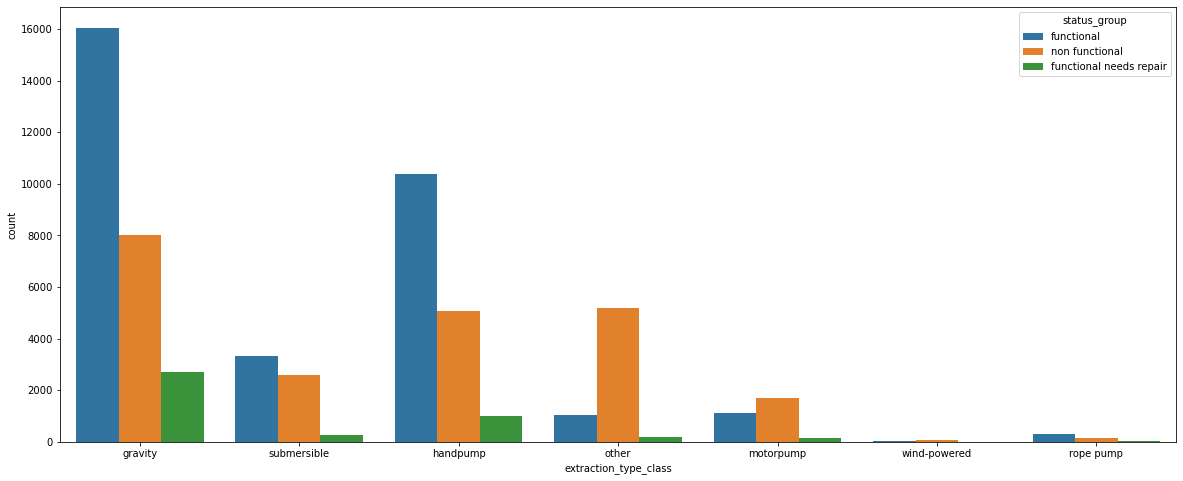

In [37]:
sns.countplot(x='extraction_type_class', hue="status_group", data=data)

# 1.7. waterpoint_type / waterpoint_type_group

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-38-b3fff8c33d35>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


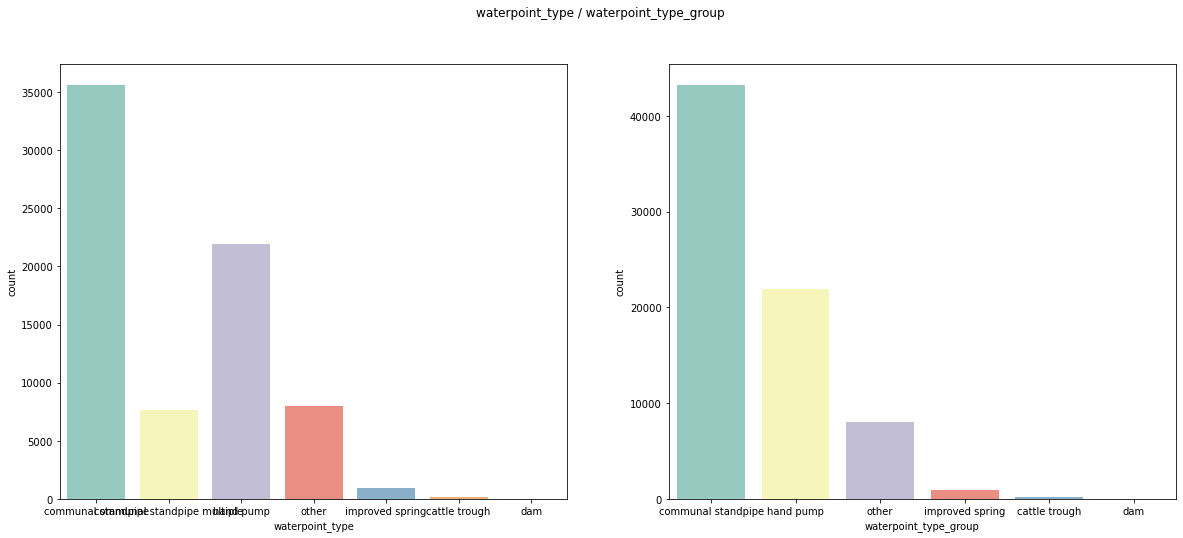

In [38]:
plt.rcParams["figure.figsize"] = (20,8)
fig, axes = plt.subplots(1, 2)
sns.countplot(data.waterpoint_type, x='col1', ax=axes[0], palette = 'Set3', )
sns.countplot(data.waterpoint_type_group, x="col2", ax=axes[1], palette = 'Set3')
fig.suptitle('waterpoint_type / waterpoint_type_group')
fig.show()

In [39]:
data['waterpoint_type'].value_counts()

communal standpipe             35628
hand pump                      21884
other                           8010
communal standpipe multiple     7611
improved spring                  959
cattle trough                    150
dam                                8
Name: waterpoint_type, dtype: int64

In [40]:
data['waterpoint_type_group'].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

<AxesSubplot:xlabel='waterpoint_type', ylabel='count'>

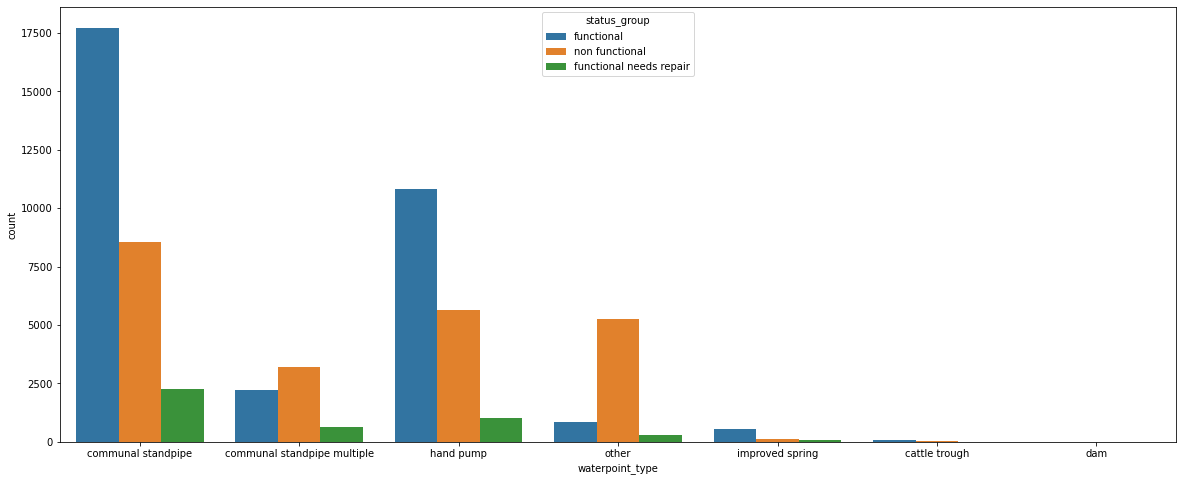

In [41]:
sns.countplot( data=data, x='waterpoint_type', hue="status_group")

# 1.8. recorded_by column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


GeoData Consultants Ltd    74250
Name: recorded_by, dtype: int64

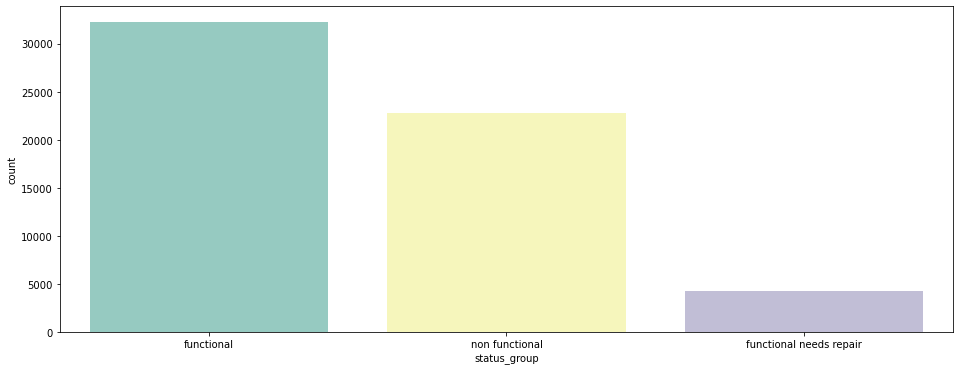

In [42]:
data['recorded_by'].value_counts()
plt.figure(figsize=(16,6))
sns.countplot(data.status_group, palette = 'Set3')
data.recorded_by.value_counts()

# 1.9 wpt_name / scheme_name

In [43]:
data['wpt_name'].value_counts()

none               4440
Shuleni            2183
Zahanati           1034
Msikitini           647
Kanisani            390
                   ... 
Nyamanje              1
Kiluku                1
Kigula                1
Kwa Jarid Yasin       1
Robert Majebere       1
Name: wpt_name, Length: 45684, dtype: int64

In [44]:
data['scheme_name'].value_counts()

K                              858
None                           794
Borehole                       704
Chalinze wate                  501
M                              490
                              ... 
Mese line                        1
BL RC                            1
REGWA Company of Egypt           1
Borehole pump pumped scheme      1
Ikuna grwater Scheme             1
Name: scheme_name, Length: 2868, dtype: int64

# 1.10 amount_tsh column

In [45]:
data['amount_tsh'].value_counts()

0.00         52049
500.00        3874
50.00         3103
1000.00       1858
20.00         1812
             ...  
59.00            1
38000.00         1
120000.00        1
220.00           1
0.25             1
Name: amount_tsh, Length: 102, dtype: int64

# 1.11 num_private column

In [46]:
data['num_private'].value_counts()

0      73299
1         94
6         92
5         60
8         58
       ...  
420        1
35         1
30         1
672        1
62         1
Name: num_private, Length: 68, dtype: int64

# 1.12 date_recorded column

In [47]:
data['date_recorded'].value_counts()

2011-03-17    695
2011-03-15    694
2013-02-03    684
2011-03-16    650
2011-03-14    649
             ... 
2011-09-05      1
2011-09-22      1
2011-09-11      1
2011-09-12      1
2002-10-14      1
Name: date_recorded, Length: 369, dtype: int64

# 1.13 subvillage column

In [48]:
data['subvillage'].value_counts()

Shuleni            646
Majengo            631
Madukani           629
Kati               467
Mtakuja            322
                  ... 
Mazinde Antakae      1
Walanga 'B'          1
Msapa                1
Mbaru                1
Daumboy              1
Name: subvillage, Length: 21425, dtype: int64

# 1.14 construction_year

<AxesSubplot:xlabel='construction_year', ylabel='count'>

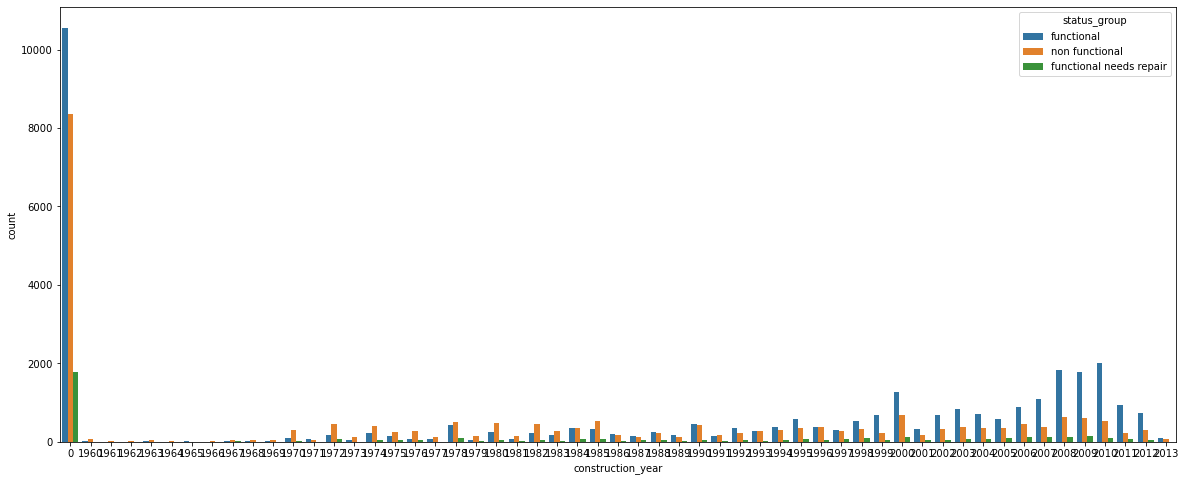

In [49]:
sns.countplot( data=data, x='construction_year', hue="status_group")

# Drop Similar Columns

In [50]:
data.drop(columns=['management_group', 'date_recorded', 'scheme_management', 'quantity_group', 'source_class', 'source_type', 'quality_group', 'payment_type', 'extraction_type', 'extraction_type_class', 'waterpoint_type_group', 'recorded_by', 'wpt_name', 'scheme_name', 'num_private', 'subvillage', 'lga','ward'], inplace=True )

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   funder                 69746 non-null  object 
 3   gps_height             74250 non-null  int64  
 4   installer              69718 non-null  object 
 5   longitude              74250 non-null  float64
 6   latitude               74250 non-null  float64
 7   basin                  74250 non-null  object 
 8   region                 74250 non-null  object 
 9   region_code            74250 non-null  int64  
 10  district_code          74250 non-null  int64  
 11  population             74250 non-null  int64  
 12  public_meeting         70095 non-null  object 
 13  permit                 70457 non-null  object 
 14  construction_year      74250 non-null  int64  
 15  ex

# 2 Zero Value List
* construction_year -> apply non zero median : 2000 for zero values
* funder -> replace 'other' for NaN values
* installer -> replace 'other' for NaN & zero values, correct some spelling mistakes and syntax in some category
* longitude -> replace mean of region's longitude for 0.0000 values 
* public_meeting -> replace true Nan values 
* permit -> replace true Nan values 

# 2.1 construction_year column

In [52]:
data['construction_year'].value_counts()

0       25969
2010     3314
2008     3243
2009     3196
2000     2578
2007     1960
2006     1892
2011     1591
2003     1579
2004     1417
2012     1347
2002     1343
1995     1283
2005     1275
1978     1267
1999     1222
1998     1190
1985     1177
1990     1176
1996     1020
1980     1005
1984      970
1994      940
1982      926
1972      892
1997      821
1974      814
1992      807
1993      745
2001      680
1988      657
1983      594
1975      561
1986      553
1976      525
1970      493
1991      407
1989      396
1987      370
1981      291
1977      247
1979      245
1973      227
2013      209
1971      177
1960      124
1963      107
1967      106
1968       93
1969       77
1964       48
1962       36
1961       28
1965       21
1966       19
Name: construction_year, dtype: int64

In [53]:
construction_year_medain = int((data['construction_year'].loc[data['construction_year'] != 0]).median())
data['construction_year'].replace(to_replace = 0, value = construction_year_medain, inplace=True)
construction_year_medain

2000

# 2.2 funder column

In [54]:
data['funder'].value_counts().head(50)

Government Of Tanzania            11299
Danida                             3907
Hesawa                             2782
Rwssp                              1703
World Bank                         1701
Kkkt                               1623
World Vision                       1562
Unicef                             1324
Tasaf                              1136
Dhv                                1065
District Council                   1037
Private Individual                 1034
Dwsp                               1012
0                                   980
Norad                               949
Germany Republi                     765
Water                               739
Tcrs                                735
Ministry Of Water                   728
Dwe                                 605
Netherlands                         592
Hifab                               577
Adb                                 551
Lga                                 546
Amref                               525


In [55]:
data.groupby(['funder','status_group']).size().head(50)

funder                       status_group           
0                            functional                 445
                             functional needs repair      3
                             non functional             329
A/co Germany                 functional                   7
                             functional needs repair      1
                             non functional               7
Aar                          functional                  22
                             functional needs repair      4
                             non functional               7
Abas Ka                      functional                   1
Abasia                       functional                  36
                             functional needs repair      2
                             non functional               5
Abc-ihushi Development Cent  non functional               1
Abd                          functional                   5
                             non functional    

Text(0.5, 1.0, 'funder / status_group for most 15 frequence values')

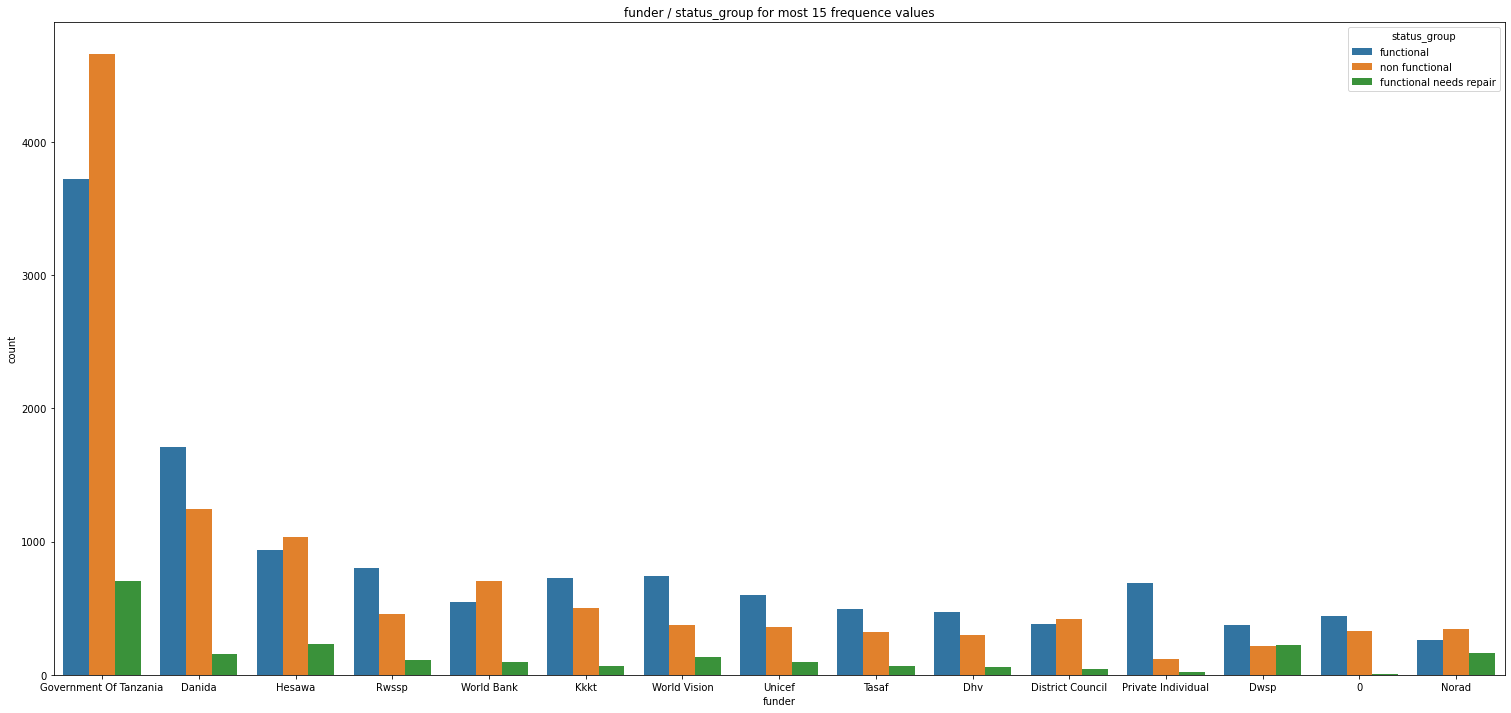

In [56]:

plt.figure(figsize=(26,12))
sns.countplot(data=data, x='funder', hue="status_group", order=data.funder.value_counts().iloc[:15].index)
plt.title('funder / status_group for most 15 frequence values')

most of the water points which funded by government are non-functional

In [57]:
data["funder"].fillna("other", inplace=True)

# 2.3 installer column

In [58]:
data['installer'].value_counts().head(50)

DWE                           21751
Government                     2282
RWE                            1498
Commu                          1347
DANIDA                         1305
KKKT                           1120
Hesawa                         1070
0                               980
TCRS                            887
CES                             765
Central government              764
DANID                           690
Community                       687
HESAWA                          679
District Council                663
World vision                    517
TASAF                           504
LGA                             501
WEDECO                          496
District council                490
Gover                           483
AMREF                           398
TWESA                           395
WU                              377
Dmdd                            356
ACRA                            346
World Vision                    326
SEMA                        

In [59]:
installer_map = [[ ['District Water Department', 'District water depar','Distric Water Department'], 'District water department' ],
                 [['JAICA'],'Jaica'],
                 [['FinW','Fini water','FINI WATER'],'Fini Water'],
                 [['RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church','RC CATHORIC'],'RC Church'],
                 [['World vision', 'World Division','World Vision'],'world vision'],
                 [['COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'],'District council'],
                 [['DANID'],'DANIDA'],
                 [['Hesawa'],'HESAWA'],
                 [['Central Government','Tanzania Government','central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt'],'Central government'],
                 [['Unisef','UNICEF'],'Unicef'],
                 [['villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'],'villagers'],
                 [['GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen'],'Government'],
                 [['Commu','Communit','commu','COMMU', 'COMMUNITY'],'Community']

                ]

In [60]:
for installer_map_data in installer_map:
    data['installer'].replace(to_replace = installer_map_data[0], value =installer_map_data[1] , inplace=True)

In [61]:

data['installer'].fillna(value='other',inplace=True)
data['installer'].replace(to_replace = '0', value ='other' , inplace=True)

In [62]:
data['installer'].value_counts().head(20)

DWE                   21751
other                  5512
Government             3337
Community              2112
DANIDA                 1995
HESAWA                 1749
RWE                    1498
District council       1449
Central government     1359
KKKT                   1120
TCRS                    887
world vision            846
CES                     765
Fini Water              732
RC Church               586
villagers               514
TASAF                   504
LGA                     501
WEDECO                  496
Unicef                  421
Name: installer, dtype: int64

Text(0.5, 1.0, 'installer / status_group for most 15 frequence values')

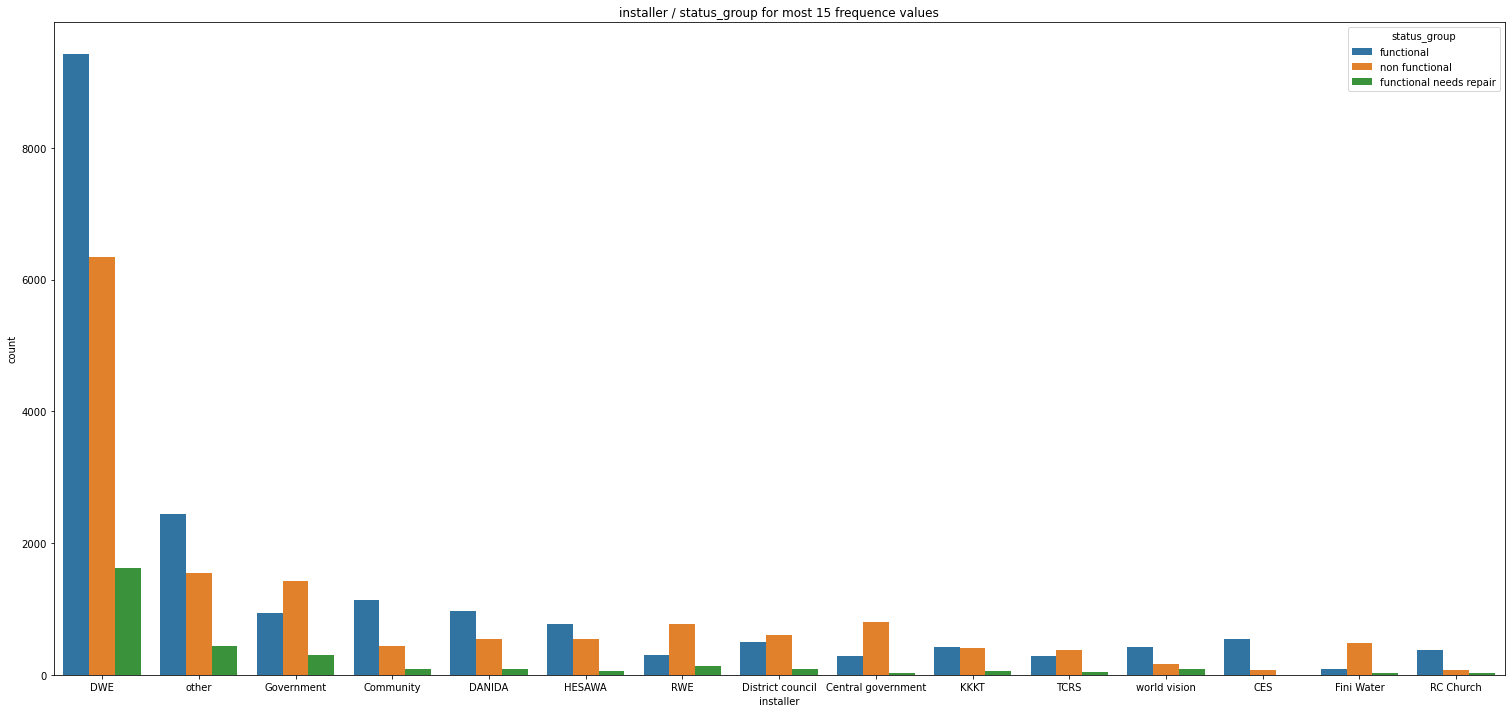

In [63]:
plt.figure(figsize=(26,12))
sns.countplot(data=data, x='installer', hue="status_group", order=data.installer.value_counts().iloc[:15].index)
plt.title('installer / status_group for most 15 frequence values')

DWE : has most functional wells and non functional wells

government, central government, district council, RWE, Fini Water : have most non functional wells

# 2.4 longitude / latitude column

In [64]:
data['longitude'].replace(0.0, np.nan, inplace=True)
data['latitude'].replace(0.0, np.nan, inplace=True)

In [65]:
data['longitude'].isnull().sum()

2269

In [66]:
data['latitude'].isnull().sum()

0

In [67]:
data.groupby('region_code')[['longitude']].mean().head()

,longitude
region_code,
1,36.041964
2,36.650754
3,37.505459
4,38.519192
5,37.047846


In [68]:
data["longitude"].fillna(data.groupby("region_code").transform(lambda x: x.fillna(x.mean())).longitude, inplace=True)

In [69]:
data['longitude'].isnull().sum()

0

<AxesSubplot:xlabel='region', ylabel='count'>

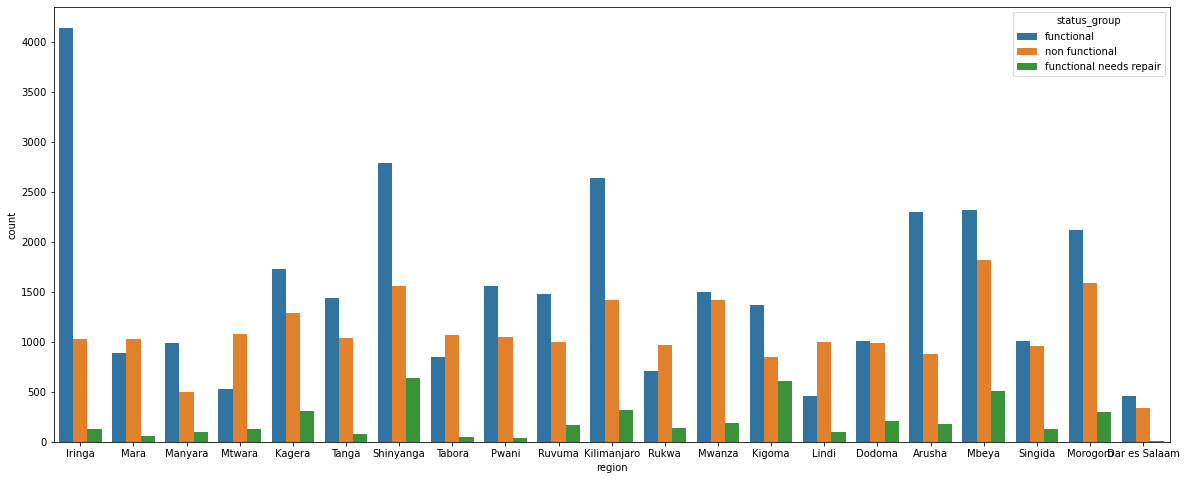

In [70]:
sns.countplot(x='region', hue="status_group", data=data)

# 2.5 gps_height column

In [71]:
data['gps_height'].value_counts()

 0       25649
-16         71
-15         69
-13         68
-19         65
         ...  
 2353        1
 2417        1
 2545        1
 2416        1
 2285        1
Name: gps_height, Length: 2456, dtype: int64

# 2.6 permit column

In [72]:
data['permit'].value_counts()

True     48606
False    21851
Name: permit, dtype: int64

In [73]:
data['permit'].fillna(value=True, inplace=True)

In [74]:
data['permit']

0        False
1         True
2         True
3         True
4         True
         ...  
14845     True
14846    False
14847     True
14848     True
14849     True
Name: permit, Length: 74250, dtype: bool

In [75]:
data.permit = data.permit.astype(bool).astype(int)

In [76]:
data['permit']

0        0
1        1
2        1
3        1
4        1
        ..
14845    1
14846    0
14847    1
14848    1
14849    1
Name: permit, Length: 74250, dtype: int32

# 2.7 public_meeting column

In [77]:
data['public_meeting'].value_counts()

True     63749
False     6346
Name: public_meeting, dtype: int64

In [78]:
data['public_meeting'].fillna(value=True,inplace=True)

In [79]:
data['public_meeting']

0        True
1        True
2        True
3        True
4        True
         ... 
14845    True
14846    True
14847    True
14848    True
14849    True
Name: public_meeting, Length: 74250, dtype: bool

In [80]:
data.public_meeting  = data.public_meeting.astype(bool).astype(int)

In [81]:
data['public_meeting']

0        1
1        1
2        1
3        1
4        1
        ..
14845    1
14846    1
14847    1
14848    1
14849    1
Name: public_meeting, Length: 74250, dtype: int32

# 2.8 basin column

In [82]:
data['basin'].value_counts()

Lake Victoria              12871
Pangani                    11143
Rufiji                      9987
Internal                    9642
Lake Tanganyika             8052
Wami / Ruvu                 7577
Lake Nyasa                  6332
Ruvuma / Southern Coast     5587
Lake Rukwa                  3059
Name: basin, dtype: int64

# 2.9 population column

In [83]:
data['population'].value_counts()

0       26834
1        8782
200      2370
150      2328
250      2087
        ...  
8500        1
2353        1
4210        1
1177        1
895         1
Name: population, Length: 1128, dtype: int64

In [84]:
population_mean = int((data['population'].loc[data['population'] != 0]).mean())
data['population'].replace(to_replace = 0, value = population_mean, inplace=True)
population_mean

283

In [85]:
data.isnull().sum()

id                           0
amount_tsh                   0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
basin                        0
region                       0
region_code                  0
district_code                0
population                   0
public_meeting               0
permit                       0
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
status_group             14850
dtype: int64

In [86]:
data.drop(columns=['region_code'],inplace=True )

# 3 Encoding

In [87]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import RobustScaler

# 3.2 Reduce size of category_columns

Gets the top 20 values from the funder and installer

In [88]:
data.nunique()

id                       74250
amount_tsh                 102
funder                    2141
gps_height                2456
installer                 2330
longitude                71872
latitude                 71869
basin                        9
region                      21
district_code               20
population                1127
public_meeting               2
permit                       2
construction_year           54
extraction_type_group       13
management                  12
payment                      7
water_quality                8
quantity                     5
source                      10
waterpoint_type              7
status_group                 3
dtype: int64

In [89]:
data['funder'].value_counts().head(50)

Government Of Tanzania            11299
other                              4504
Danida                             3907
Hesawa                             2782
Rwssp                              1703
World Bank                         1701
Kkkt                               1623
World Vision                       1562
Unicef                             1324
Tasaf                              1136
Dhv                                1065
District Council                   1037
Private Individual                 1034
Dwsp                               1012
0                                   980
Norad                               949
Germany Republi                     765
Water                               739
Tcrs                                735
Ministry Of Water                   728
Dwe                                 605
Netherlands                         592
Hifab                               577
Adb                                 551
Lga                                 546


In [90]:
def get_n(x,n):
    list_a = set(x.value_counts().index[:n].values) #Gets the top 20 values from the series
    x[~x.isin(list_a)] = 'other' #vectorisation - boolean mask; tilda - inverting the boolean mask
    return x

In [91]:
data['installer'].nunique()

2330

In [92]:
data.funder = get_n(data.funder,20)
data.installer  = get_n(data.installer ,20)

<ipython-input-90-c6facf211b40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[~x.isin(list_a)] = 'other' #vectorisation - boolean mask; tilda - inverting the boolean mask


In [93]:
data['funder'].value_counts()

other                     38169
Government Of Tanzania    11299
Danida                     3907
Hesawa                     2782
Rwssp                      1703
World Bank                 1701
Kkkt                       1623
World Vision               1562
Unicef                     1324
Tasaf                      1136
Dhv                        1065
District Council           1037
Private Individual         1034
Dwsp                       1012
0                           980
Norad                       949
Germany Republi             765
Water                       739
Tcrs                        735
Ministry Of Water           728
Name: funder, dtype: int64

In [94]:
data

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,6000.0,other,1390,other,34.938093,-9.856322,Lake Nyasa,Iringa,5,...,0,1999,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.0,other,1399,other,34.698766,-2.147466,Lake Victoria,Mara,2,...,1,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,25.0,other,686,world vision,37.460664,-3.821329,Pangani,Manyara,4,...,1,2009,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.0,Unicef,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,...,1,1986,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.0,other,0,other,31.130847,-1.825359,Lake Victoria,Kagera,1,...,1,2000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,Danida,34,other,38.852669,-6.582841,Wami / Ruvu,Pwani,1,...,1,1988,mono,vwc,never pay,soft,enough,river,communal standpipe,NaN
14846,18990,1000.0,other,0,other,37.451633,-5.350428,Pangani,Tanga,7,...,0,1994,nira/tanira,vwc,pay annually,salty,insufficient,shallow well,hand pump,NaN
14847,28749,0.0,other,1476,other,34.739804,-4.585587,Internal,Singida,2,...,1,2010,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,NaN
14848,33492,0.0,other,998,DWE,35.432732,-10.584159,Lake Nyasa,Ruvuma,2,...,1,2009,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,NaN


# 3.3 scaling -> numeric_columns

In [95]:
numeric_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'district_code', 'population', 'construction_year', 'public_meeting', 'permit']

In [96]:
scaler = RobustScaler()

In [97]:
for c in numeric_columns:
    robust_data = scaler.fit_transform(data[[c]])
    data.loc[:, (c)]=robust_data
data

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,district_code,...,permit,construction_year,extraction_type_group,management,payment,water_quality,quantity,source,waterpoint_type,status_group
0,69572,300.00,other,0.779043,other,0.007757,-0.928694,Lake Nyasa,Iringa,0.666667,...,-1.0,-0.125,gravity,vwc,pay annually,soft,enough,spring,communal standpipe,functional
1,8776,0.00,other,0.785877,other,-0.052875,0.553602,Lake Victoria,Mara,-0.333333,...,0.0,1.250,gravity,wug,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,34310,1.25,other,0.244495,world vision,0.646833,0.231744,Pangani,Manyara,0.333333,...,0.0,1.125,gravity,vwc,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,67743,0.00,Unicef,-0.076689,Unicef,0.906636,-1.178467,Ruvuma / Southern Coast,Mtwara,20.000000,...,0.0,-1.750,submersible,vwc,never pay,soft,dry,machine dbh,communal standpipe multiple,non functional
4,19728,0.00,other,-0.276386,other,-0.956783,0.615539,Lake Victoria,Kagera,-0.666667,...,0.0,0.000,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.00,Danida,-0.250569,other,0.999488,-0.299253,Wami / Ruvu,Pwani,-0.666667,...,0.0,-1.500,mono,vwc,never pay,soft,enough,river,communal standpipe,NaN
14846,18990,50.00,other,-0.276386,other,0.644545,-0.062279,Pangani,Tanga,1.333333,...,-1.0,-0.750,nira/tanira,vwc,pay annually,salty,insufficient,shallow well,hand pump,NaN
14847,28749,0.00,other,0.844343,other,-0.042478,0.084789,Internal,Singida,-0.333333,...,0.0,1.250,gravity,vwc,never pay,soft,insufficient,dam,communal standpipe,NaN
14848,33492,0.00,other,0.481397,DWE,0.133070,-1.068646,Lake Nyasa,Ruvuma,-0.333333,...,0.0,1.125,gravity,vwc,never pay,soft,insufficient,river,communal standpipe,NaN


# 3.4 encoding -> category_columns

In [98]:
category_onehot__columns = ['installer','quantity', 'payment', 'funder', 'basin','region',  'extraction_type_group', 'management', 'water_quality', 'source', 'waterpoint_type']
category_traget_columns  = ['installer','quantity', 'payment', 'funder', 'basin','region',  'extraction_type_group', 'management', 'water_quality', 'source', 'waterpoint_type']

In [99]:
onehot_encoder = ce.OneHotEncoder(cols=category_onehot__columns, use_cat_names=True)
traget_encoder = ce.TargetEncoder(cols=category_traget_columns)

# 3.5 Prepare datasets

In [100]:
data_1 = data.copy()

test_data_1 = data_1[len(train_data):]
train_data_1 = data_1[:len(train_data)]

# 4 Modelling

In [101]:
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from xgboost import XGBClassifier

# 4.1 Label encoding -> status_group column

In [102]:
status_group_label = {'functional':0, 'non functional': 1, 'functional needs repair': 2}
train_data_1.loc[:, ('status_group')] = train_data_1.status_group.replace(status_group_label)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [103]:
train_data_1_target = train_data_1.copy()
test_data_1_target = test_data_1.copy()

train_data_1_onehot = train_data_1.copy()
test_data_1_onehot = test_data_1.copy()

target='status_group'

# 4.1 Target encoding

In [104]:
train_data_1_target = traget_encoder.fit_transform(train_data_1_target, train_data_1_target[target])
test_data_1_target = traget_encoder.transform(test_data_1_target)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [105]:
used_cols = [c for c in train_data_1_target.columns.tolist() if c not in [target]]
X1_target=train_data_1_target[used_cols]
y1_target=train_data_1_target[target]

X_target_train, X_target_test, y_target_train, y_target_test = train_test_split(X1_target, y1_target, test_size=0.2, random_state=42)

# 4.2 Onehot encoding

In [106]:
train_data_1_onehot = onehot_encoder.fit_transform(train_data_1_onehot)
test_data_1_onehot = onehot_encoder.fit_transform(test_data_1_onehot)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [107]:
used_cols = [c for c in train_data_1_onehot.columns.tolist() if c not in [target]]
X1_onehot=train_data_1_onehot[used_cols]
y1_onehot=train_data_1_onehot[target]

X_onehot_train, X_onehot_test, y_onehot_train, y_onehot_test = train_test_split(X1_onehot, y1_onehot, test_size=0.2, random_state=42)

# 4.2 RandomForestClassifier

In [108]:
rfc_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')
rfc_model.fit(X_target_train, y_target_train)
scoreRFC_target= rfc_model.score(X_target_test,y_target_test)
print('Random Forest' ,scoreRFC_target)

rfc_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')
rfc_model.fit(X_onehot_train, y_onehot_train)
scoreRFC_onehot= rfc_model.score(X_onehot_test,y_onehot_test)
print('Random Forest' ,scoreRFC_onehot)

Random Forest 0.8072390572390572
Random Forest 0.8073232323232323


# 4.3 XGBClassifier

In [109]:
xgb_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', num_class = 3, eval_metric = 'merror', eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1, max_delta_step=1)
xgb_model.fit(X_target_train, y_target_train)
scoreXGB_target= xgb_model.score(X_target_test,y_target_test)
print('XGB' ,scoreXGB_target)

xgb_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', num_class = 3, eval_metric = 'merror', eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1, max_delta_step=1)
xgb_model.fit(X_onehot_train, y_onehot_train)
scoreXGB_onehot= xgb_model.score(X_onehot_test,y_onehot_test)
print('XGB' ,scoreXGB_onehot)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels

XGB 0.8079124579124579
XGB 0.8094276094276094


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [110]:
score = pd.DataFrame([("Random Forest", "Target Encoder", scoreRFC_target), ("Random Forest", "Onehot Encoder", scoreRFC_onehot), ("XGBClassifier", "Target Encoder", scoreXGB_target), ("XGBClassifier", "Onehot Encoder", scoreXGB_onehot)], 
                     columns=["Model", "Encoder", "score"])
score

,Model,Encoder,score
0,Random Forest,Target Encoder,0.807239
1,Random Forest,Onehot Encoder,0.807323
2,XGBClassifier,Target Encoder,0.807912
3,XGBClassifier,Onehot Encoder,0.809428


XGBClassifier with Onehot Encoder provide higher score

# 4.5 Feature Selection

In [111]:
rfc_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1,class_weight='balanced')
rfc_model.fit(X_onehot_train, y_onehot_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, n_jobs=-1,
                       random_state=42)

In [112]:
importances = rfc_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_names = X1_onehot.columns.tolist()

for f in range(X1_onehot.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]), feature_names[indices[f]])

Feature ranking:
1. feature 43 (0.116489) longitude
2. feature 44 (0.114368) latitude
3. feature 0 (0.089252) id
4. feature 22 (0.059406) gps_height
5. feature 122 (0.047274) quantity_dry
6. feature 79 (0.043826) construction_year
7. feature 76 (0.042963) population
8. feature 75 (0.028764) district_code
9. feature 1 (0.021205) amount_tsh
10. feature 120 (0.019980) quantity_enough
11. feature 85 (0.016316) extraction_type_group_other
12. feature 121 (0.014736) quantity_insufficient
13. feature 80 (0.014443) extraction_type_group_gravity
14. feature 138 (0.013740) waterpoint_type_other
15. feature 106 (0.010440) payment_never pay
16. feature 135 (0.010040) waterpoint_type_communal standpipe
17. feature 2 (0.009883) funder_other
18. feature 137 (0.009650) waterpoint_type_hand pump
19. feature 78 (0.009434) permit
20. feature 26 (0.009229) installer_DWE
21. feature 93 (0.009110) management_vwc
22. feature 23 (0.008724) installer_other
23. feature 125 (0.008240) source_spring
24. feature 1

In [113]:
xgb_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', num_class = 3, eval_metric = 'merror', eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1, max_delta_step=1)
xgb_model.fit(X_onehot_train, y_onehot_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eta=0.1,
              eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=1,
              max_depth=12, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_class=3, num_parallel_tree=1, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Feature ranking:
1. feature 122 (0.397269) -  quantity_dry
2. feature 138 (0.056907) -  waterpoint_type_other
3. feature 85 (0.036111) -  extraction_type_group_other
4. feature 54 (0.012415) -  region_Iringa
5. feature 120 (0.011458) -  quantity_enough
6. feature 30 (0.008600) -  installer_Central government
7. feature 115 (0.008425) -  water_quality_unknown
8. feature 136 (0.007854) -  waterpoint_type_communal standpipe multiple
9. feature 135 (0.007838) -  waterpoint_type_communal standpipe
10. feature 45 (0.007654) -  basin_Lake Nyasa
11. feature 83 (0.007497) -  extraction_type_group_nira/tanira
12. feature 67 (0.007189) -  region_Kigoma
13. feature 139 (0.007184) -  waterpoint_type_improved spring
14. feature 126 (0.007145) -  source_rainwater harvesting
15. feature 80 (0.006688) -  extraction_type_group_gravity
16. feature 137 (0.006176) -  waterpoint_type_hand pump
17. feature 4 (0.006020) -  funder_Dwsp
18. feature 55 (0.005886) -  region_Mara
19. feature 60 (0.005734) -  regio

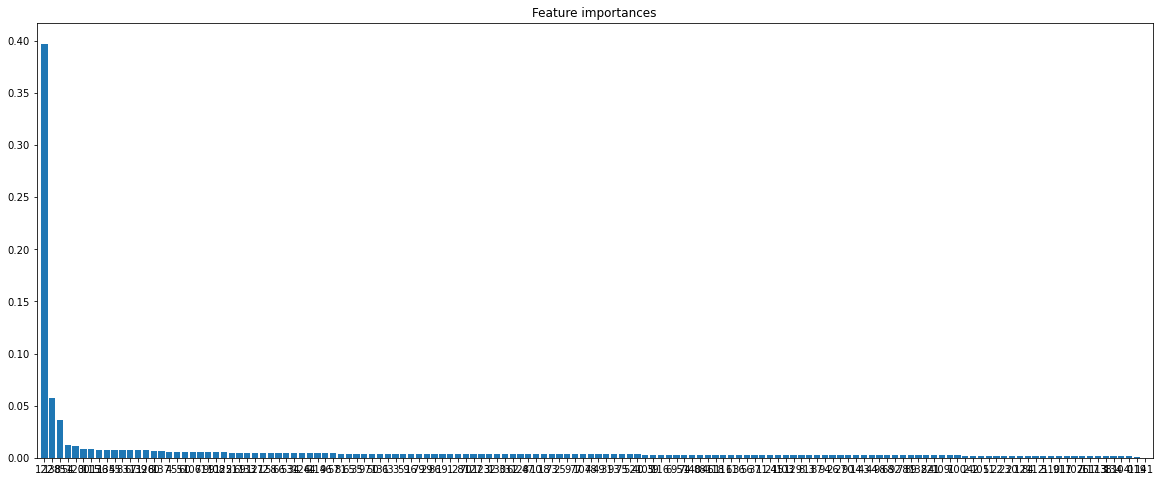

In [114]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_names = X1_onehot.columns.tolist()

for f in range(X1_onehot.shape[1]):
    print("%d. feature %d (%f) - " % (f + 1, indices[f], importances[indices[f]]), feature_names[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(X1_onehot.shape[1]), importances[indices], align="center")
# plt.bar([x for x in range(len(importances))], importances)
plt.xticks(range(X1_onehot.shape[1]), indices)
plt.xlim([-1, X1_onehot.shape[1]])
plt.show()

# 4.6 Re Modeling After Feature Selection

Remove lowest features: 'waterpoint_type_dam', 'water_quality_fluoride abandoned'

In [115]:
data_2 = data.copy()
data_2 = onehot_encoder.fit_transform(data_2)

data_2.drop(columns=['waterpoint_type_dam', 'water_quality_fluoride abandoned', 'id'],inplace=True )

test_data_2 = data_2[len(train_data):]
train_data_2 = data_2[:len(train_data)]

train_data_2.loc[:, ('status_group')] = train_data_2.status_group.replace(status_group_label)

used_cols = [c for c in train_data_2.columns.tolist() if c not in [target]]
X2=train_data_2[used_cols]
y2=train_data_2[target]

# to divide our X2 and y2 to test and train
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [116]:
xgb_model = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', num_class = 3, eval_metric = 'merror', eta = .1,max_depth = 12, colsample_bytree = .4, learning_rate = 0.1, max_delta_step=1)
xgb_model.fit(X2_train, y2_train)
scoreXGB= xgb_model.score(X2_test,y2_test)
print('XGB' ,scoreXGB)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


XGB 0.8121212121212121


# 5 Post-processing (insight extraction) approache

In [117]:
from sklearn.inspection import plot_partial_dependence

In [118]:
numeric_columns

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'district_code',
 'population',
 'construction_year',
 'public_meeting',
 'permit']

In [119]:
# X2_train.columns.get_loc('construction_year')

In [120]:
feature_list = [0, 21, 78]

# 5.1 Functional vs Non Functional vs Functional Needs Repair

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


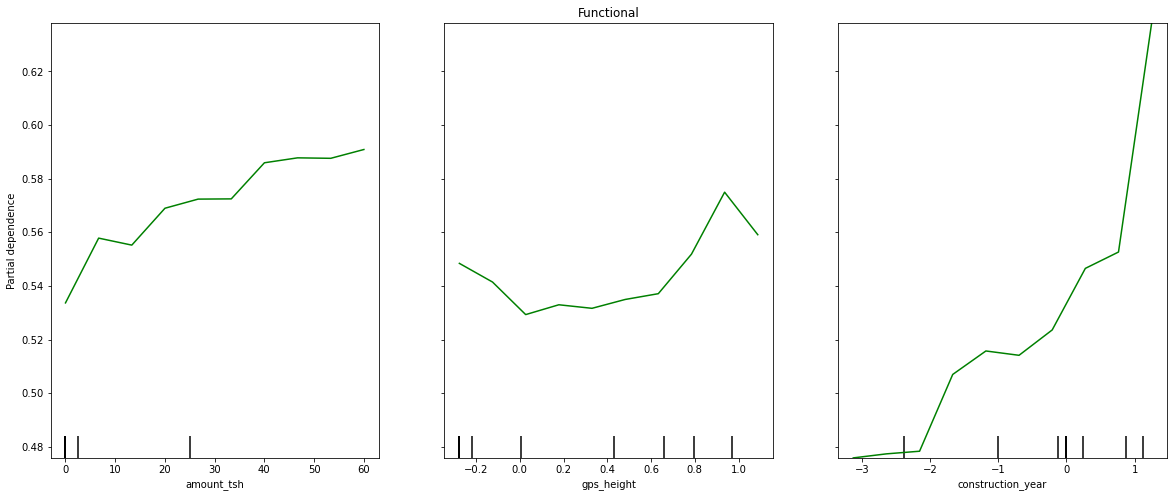

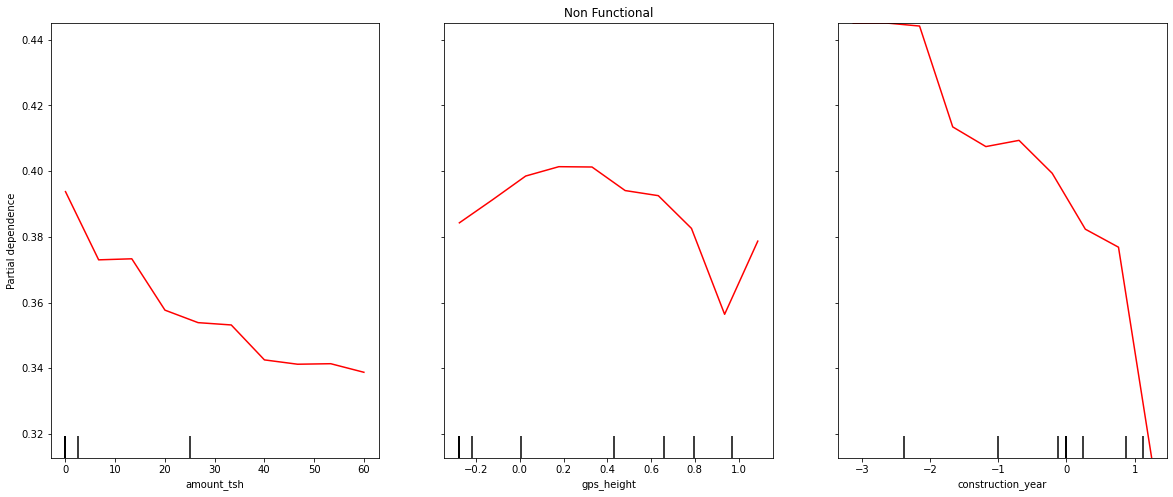

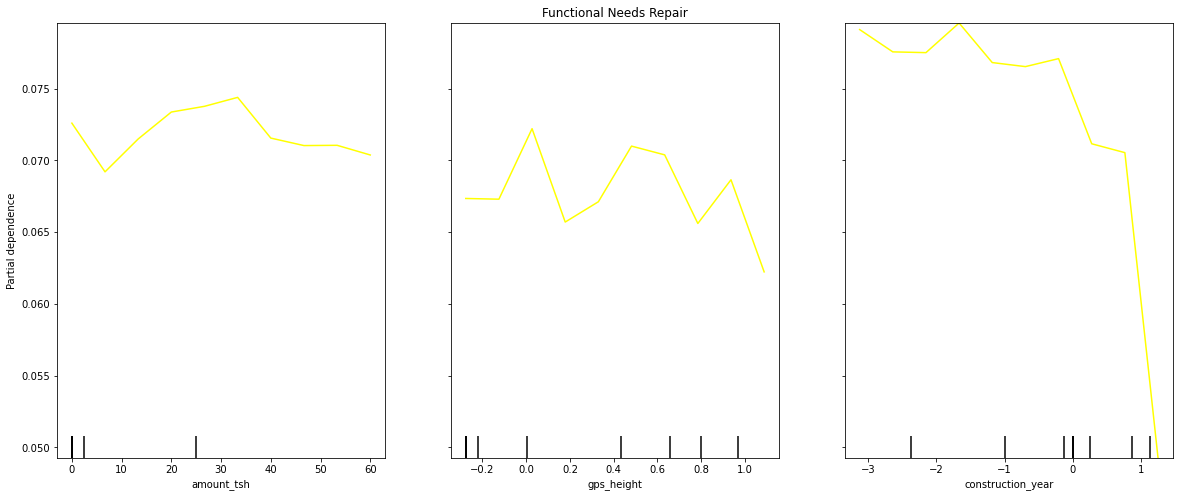

In [121]:
fig1, ax1 = plt.subplots()
ax1.set_title("Functional")
functional_dependence = plot_partial_dependence(xgb_model, features=feature_list, X=X2_train, feature_names=used_cols, target=0, grid_resolution=10, ax=ax1, line_kw={"color": "green"})

fig2, ax2 = plt.subplots()
ax2.set_title("Non Functional")
non_functional_dependence = plot_partial_dependence(xgb_model, features=feature_list, X=X2_train, feature_names=used_cols, target=1, grid_resolution=10, ax=ax2, line_kw={"color": "red"})

fig3, ax3 = plt.subplots()
ax3.set_title("Functional Needs Repair")
functional_repair_dependence = plot_partial_dependence(xgb_model, features=feature_list, X=X2_train, feature_names=used_cols, target=2, grid_resolution=10, ax=ax3, line_kw={"color": "yellow"})

# 6 Fit model

In [122]:
test_data_2.drop(columns=['status_group'],inplace=True )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [123]:
test_data_2

,amount_tsh,funder_other,funder_Unicef,funder_Dwsp,funder_Rwssp,funder_Danida,funder_World Vision,funder_Hesawa,funder_Government Of Tanzania,funder_Water,...,source_river,source_hand dtw,source_lake,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_improved spring,waterpoint_type_cattle trough
0,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
14846,50.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
14847,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14848,0.0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [124]:
X_topredict=test_data_2
predict = xgb_model.predict(X_topredict)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [125]:
predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [126]:
test_data_predict.loc[:, ('status_group')]=predict
status_group_label_invers = {0:'functional', 1:'non functional', 2:'functional needs repair'}
test_data_predict.loc[:, ('status_group')] = test_data_predict.status_group.replace(status_group_label_invers)
test_data_predict['status_group'].value_counts()

functional                 9376
non functional             5048
functional needs repair     426
Name: status_group, dtype: int64

In [127]:
test_data_predict[['id','status_group']].to_csv('submission.csv',index=False)